In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import pickle as pkl
import operator

In [2]:
filepath = "Animals/"
animalList = ["Human","Pig","Chicken","Rat","Mouse","Dog"]
levelList = ["Strict","Relaxed","Intermediate"]
sb.set_style("darkgrid")

In [3]:
def get_df_dict(level):
    df_dict = {}
    df_dict["Ohnologs"] = {}
    df_dict["No-Ohnologs"] = {}
    df_dict["Paralogs"] = {}
    for animal in animalList:        
        current_file_path = filepath + animal + "/" + level + "/"
        df_dict["Ohnologs"][animal] = pd.read_pickle(current_file_path + animal + "-" + level +"-ohnologs.pkl")
        df_dict["No-Ohnologs"][animal] = pd.read_pickle(current_file_path + animal + "-" + level +"-no-ohnologs.pkl")
        df_dict["Paralogs"][animal] = pd.read_pickle(current_file_path + animal + "-" + level +"-paralogues.pkl")        
    return df_dict

In [4]:
def get_ohnologs_complete(ohnologs_df_dict):
    df = pd.DataFrame(columns=['Sequence-1 Id','Sequence-2 Id','Sequence-1','Sequence-2','Sequence-1 Length','Sequence-2 Length','Sequence-1 GC','Sequence-2 GC','Is_Ohnolog'])
    for animal in animalList:
        df_temp = pd.DataFrame(columns=['Sequence-1 Id','Sequence-2 Id','Sequence-1','Sequence-2','Sequence-1 Length','Sequence-2 Length','Sequence-1 GC','Sequence-2 GC','Is_Ohnolog'])
        df_temp['Sequence-1 Id'] = ohnologs_df_dict[animal]["Ohnolog-1 Id"]
        df_temp['Sequence-2 Id'] = ohnologs_df_dict[animal]["Ohnolog-2 Id"]
        df_temp['Sequence-1-Transcript Id'] = ohnologs_df_dict[animal]["Ohnolog-1/Transcript-ID"]
        df_temp['Sequence-2-Transcript Id'] = ohnologs_df_dict[animal]["Ohnolog-2/Transcript-ID"]
        df_temp['Sequence-1'] = ohnologs_df_dict[animal]["Ohnolog-1/Sequence"]
        df_temp['Sequence-2'] = ohnologs_df_dict[animal]["Ohnolog-2/Sequence"]
        df_temp['Sequence-1 Length'] = ohnologs_df_dict[animal]["Ohnolog-1/Sequence-Lenght"]
        df_temp['Sequence-2 Length'] = ohnologs_df_dict[animal]["Ohnolog-2/Sequence-Lenght"]
        df_temp['Sequence-1 GC'] = ohnologs_df_dict[animal]["GC_Percent_1"]
        df_temp['Sequence-2 GC'] = ohnologs_df_dict[animal]["GC_Percent_2"]
        df_temp['Species'] = animal
        df_temp['Is_Ohnolog'] = 1        
        df_temp['Is_Paralog'] = 0

        print("Size of " + animal + ": " + str(len(df_temp)))
        df = df.append(df_temp)
    return df

In [5]:
def get_no_ohnologs_complete(no_ohnologs_df_dict):
    df = pd.DataFrame(columns=['Sequence-1 Id','Sequence-2 Id','Sequence-1','Sequence-2','Sequence-1 Length','Sequence-2 Length','Sequence-1 GC','Sequence-2 GC','Is_Ohnolog'])
    for animal in animalList:
        df_temp = pd.DataFrame(columns=['Sequence-1 Id','Sequence-2 Id','Sequence-1','Sequence-2','Sequence-1 Length','Sequence-2 Length','Sequence-1 GC','Sequence-2 GC','Is_Ohnolog'])
        df_temp['Sequence-1 Id'] = no_ohnologs_df_dict[animal]["Ohnolog-1 Id"]
        df_temp['Sequence-2 Id'] = no_ohnologs_df_dict[animal]["Ohnologs-2 Id"]
        df_temp['Sequence-1-Transcript Id'] = no_ohnologs_df_dict[animal]["Ohnolog-1/Transcript-ID"]
        df_temp['Sequence-2-Transcript Id'] = no_ohnologs_df_dict[animal]["Ohnolog-2/Transcript-ID"]
        df_temp['Sequence-1'] = no_ohnologs_df_dict[animal]["Ohnolog-1/Sequence"]
        df_temp['Sequence-2'] = no_ohnologs_df_dict[animal]["Ohnolog-2/Sequence"]
        df_temp['Sequence-1 Length'] = no_ohnologs_df_dict[animal]["Ohnolog-1/Sequence-Lenght"]
        df_temp['Sequence-2 Length'] = no_ohnologs_df_dict[animal]["Ohnolog-2/Sequence-Lenght"]
        df_temp['Sequence-1 GC'] = no_ohnologs_df_dict[animal]["GC_Percent_1"]
        df_temp['Sequence-2 GC'] = no_ohnologs_df_dict[animal]["GC_Percent_2"]
        df_temp['Species'] = animal
        df_temp['Is_Ohnolog'] = 0        
        df_temp['Is_Paralog'] = 0

        print("Size of " + animal + ": " + str(len(df_temp)))
        df = df.append(df_temp)
    return df

In [6]:
def get_paralogs_complete(paralogs_df_dict):
    df = pd.DataFrame(columns=['Sequence-1 Id','Sequence-2 Id','Sequence-1','Sequence-2','Sequence-1 Length','Sequence-2 Length','Sequence-1 GC','Sequence-2 GC','Is_Ohnolog'])
    for animal in animalList:
        df_temp = pd.DataFrame(columns=['Sequence-1 Id','Sequence-2 Id','Sequence-1','Sequence-2','Sequence-1 Length','Sequence-2 Length','Sequence-1 GC','Sequence-2 GC','Is_Ohnolog'])
        df_temp['Sequence-1 Id'] = paralogs_df_dict[animal]["Paralogue-1 Id"]
        df_temp['Sequence-2 Id'] = paralogs_df_dict[animal]["Paralogue-2 Id"]
        df_temp['Sequence-1-Transcript Id'] = paralogs_df_dict[animal]["Paralogue-1/Transcript-ID"]
        df_temp['Sequence-2-Transcript Id'] = paralogs_df_dict[animal]["Paralogue-2/Transcript-ID"]
        df_temp['Sequence-1'] = paralogs_df_dict[animal]["Paralogue-1/Sequence"]
        df_temp['Sequence-2'] = paralogs_df_dict[animal]["Paralogue-2/Sequence"]
        df_temp['Sequence-1 Length'] = paralogs_df_dict[animal]["Paralogue-1/Sequence-Lenght"]
        df_temp['Sequence-2 Length'] = paralogs_df_dict[animal]["Paralogue-2/Sequence-Lenght"]
        df_temp['Sequence-1 GC'] = paralogs_df_dict[animal]["GC_Percent_1"]
        df_temp['Sequence-2 GC'] = paralogs_df_dict[animal]["GC_Percent_2"]
        df_temp['Species'] = animal
        df_temp['Is_Ohnolog'] = 0
        df_temp['Is_Paralog'] = 1
                
        print("Size of " + animal + ": " + str(len(df_temp)))
        df = df.append(df_temp)
    return df

In [7]:
def standarize_df(df):
    df_temp = pd.DataFrame(columns=['Sequence-1 Id','Sequence-2 Id','Sequence-1','Sequence-2','Sequence-1 Length','Sequence-2 Length','Sequence-1 GC','Sequence-2 GC','Is_Ohnolog'])
    df_temp['Sequence-1 Id'] = df["Ohnolog-1 Id"]
    df_temp['Sequence-2 Id'] = df["Ohnolog-2 Id"]
    df_temp['Sequence-1'] = df["Ohnolog-1/Sequence"]
    df_temp['Sequence-2'] = df["Ohnolog-2/Sequence"]
    df_temp['Sequence-1 Length'] = df["Ohnolog-1/Sequence-Lenght"]
    df_temp['Sequence-2 Length'] = df["Ohnolog-2/Sequence-Lenght"]
    df_temp['Sequence-1 GC'] = df["GC_Percent_1"]
    df_temp['Sequence-2 GC'] = df["GC_Percent_2"]
    df_temp['Is_Ohnolog'] = 1
    return df_temp
    

In [8]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
def normal_test_shapiro(data):
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [9]:
workingLevel = levelList[2]
df_gene_dict = get_df_dict(workingLevel)

In [10]:
ohnologs_df_complete = get_ohnologs_complete(df_gene_dict["Ohnologs"])
len(ohnologs_df_complete)

Size of Human: 4678
Size of Pig: 4482
Size of Chicken: 1368
Size of Rat: 4023
Size of Mouse: 5154
Size of Dog: 4422


/home/jboffi/anaconda3/envs/thesis2/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


24127

In [11]:
no_ohnologs_df_complete = get_no_ohnologs_complete(df_gene_dict["No-Ohnologs"])
len(no_ohnologs_df_complete)

Size of Human: 4828
Size of Pig: 4483
Size of Chicken: 2703
Size of Rat: 5477
Size of Mouse: 5270
Size of Dog: 4423


27184

In [12]:
paralog_df_complete = get_paralogs_complete(df_gene_dict["Paralogs"])
len(paralog_df_complete)

Size of Human: 4786
Size of Pig: 3327
Size of Chicken: 2390
Size of Rat: 5467
Size of Mouse: 5222
Size of Dog: 4421


25613

In [13]:
df_on_dataset = ohnologs_df_complete.append(no_ohnologs_df_complete)
df_on_dataset = df_on_dataset.sample(frac=1,random_state=42)
len(df_on_dataset)

51311

In [14]:
df_on_dataset.head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species
5027,1,0.0,GGCGAGAGAAAGCGCGCTGCGTGCGGCCCCGCTGCCCAGAGCCTGC...,0.588679,ENSRNOG00000013328,1060,ENSRNOT00000017883,CAGTGAAAAGCCGGAGGCGGCGGCCGCACGGGCTCCGCTCGGGTTC...,0.549729,ENSRNOG00000015896,2212,ENSRNOT00000081375,Rat
1746,1,0.0,GATGTGGCTCTCCTTCCCCCCGCAGACGGCGAGACCGTGCACTACC...,0.565625,ENSSSCG00000002621,960,ENSSSCT00000002908,TTTTTTTTTTCCGGGCGGCCCCGGCGGCTGCGTACTGGCTGTGGGA...,0.441942,ENSSSCG00000006193,1421,ENSSSCT00000006787,Pig
2212,1,0.0,ACACGAGCTTCCCCACCCCTTCCGGAGGCTCGCCGTGCGCGTGCGC...,0.481227,ENSSSCG00000008335,1891,ENSSSCT00000009127,ATGGGGCTCTTGAACAGTCGAATCCTGCGATGCAGGGAGTCAGACA...,0.390325,ENSSSCG00000012360,1509,ENSSSCT00000013517,Pig
2722,1,0.0,CTTCAGATAAAAATTGGGGTATTTGAAAGAAATGGTGGAAATGGCT...,0.560559,ENSRNOG00000017905,1288,ENSRNOT00000051352,TGTGACCTGACGTCACCCAGGCGAGTTACCTCCCGCAGCCGCCACC...,0.623323,ENSRNOG00000025443,969,ENSRNOT00000035060,Rat
585,0,0.0,ATGCCGGAGCCCGGGCCGGACGCCTCGGGCACTGCCAGCGCGCCGC...,0.663730,ENSRNOG00000020637,1362,ENSRNOT00000028007,GTTGAAGATGAAGCAATAGCAGCATACATGAAGACCAAGTAAGGGG...,0.537108,ENSRNOG00000027906,8920,ENSRNOT00000031389,Rat


## We analise the data a bit. Using graphics to search if some more preprocessing is necesary

In [15]:
sb.set(style="darkgrid")

In [16]:
## Si se obtiene F score bajo considerar balancear mas la data al elimnar no ohnologos por haber mas luego del procesamiento de nulos

In [17]:
ohnologs_df_complete['Sequence-1 Length'] = ohnologs_df_complete['Sequence-1 Length'].astype(str).astype(int)
ohnologs_df_complete['Sequence-2 Length'] = ohnologs_df_complete['Sequence-2 Length'].astype(str).astype(int)
ohnologs_df_complete.describe()

,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Sequence-2 GC,Sequence-2 Length
count,24127.0,24127.000000,24127.000000,24127.000000,24127.000000
mean,0.0,0.519990,3575.472790,0.514145,3653.232644
std,0.0,0.081182,2500.783668,0.081214,2842.111311
min,0.0,0.313230,162.000000,0.311230,165.000000
25%,0.0,0.454394,1870.000000,0.449959,1874.000000
50%,0.0,0.523151,2960.000000,0.511952,3024.000000
75%,0.0,0.581953,4654.500000,0.574973,4790.000000
max,0.0,0.798851,34526.000000,0.812308,109224.000000


Text(0.5, 1.0, 'Ohnologs')

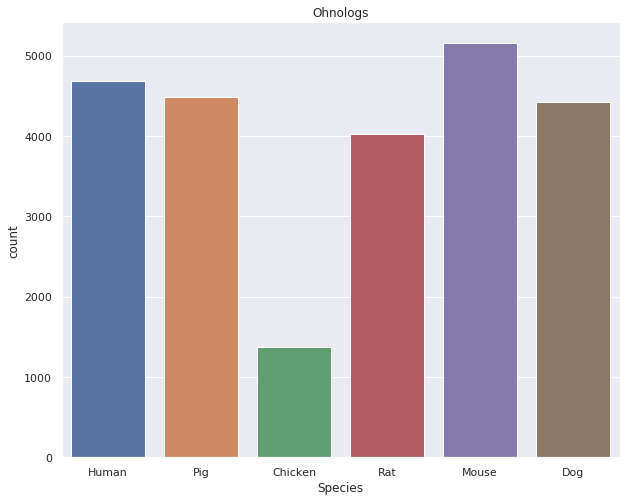

In [18]:
plt.figure(figsize=(10,8))
ax = sb.countplot(x="Species", data=ohnologs_df_complete)
ax.set_title("Ohnologs")

In [19]:
no_ohnologs_df_complete['Sequence-1 Length'] = no_ohnologs_df_complete['Sequence-1 Length'].astype(str).astype(int)
no_ohnologs_df_complete['Sequence-2 Length'] = no_ohnologs_df_complete['Sequence-2 Length'].astype(str).astype(int)
no_ohnologs_df_complete.describe()

,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Sequence-2 GC,Sequence-2 Length
count,27184.0,27184.000000,27184.000000,27184.000000,27184.000000
mean,0.0,0.509497,2683.772918,0.509431,2682.371432
std,0.0,0.083039,2211.231363,0.082727,2386.640629
min,0.0,0.225352,51.000000,0.166667,54.000000
25%,0.0,0.445284,1134.000000,0.445341,1116.000000
50%,0.0,0.504412,2079.000000,0.504282,2084.000000
75%,0.0,0.568287,3592.250000,0.568288,3550.000000
max,0.0,0.857002,34526.000000,0.850144,109224.000000


Text(0.5, 1.0, 'No Ohnologs')

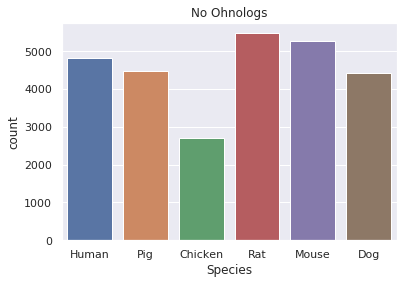

In [20]:
ax = sb.countplot(x="Species", data=no_ohnologs_df_complete)
ax.set_title("No Ohnologs")

In [21]:
paralog_df_complete['Sequence-1 Length'] = paralog_df_complete['Sequence-1 Length'].astype(str).astype(int)
paralog_df_complete['Sequence-2 Length'] = paralog_df_complete['Sequence-2 Length'].astype(str).astype(int)
paralog_df_complete.describe()

,Is_Paralog,Sequence-1 GC,Sequence-1 Length,Sequence-2 GC,Sequence-2 Length
count,25613.0,25613.000000,25613.000000,25613.000000,25613.000000
mean,1.0,0.514123,3669.718385,0.514135,3436.225940
std,0.0,0.081213,2522.263636,0.081979,2479.339042
min,1.0,0.314939,207.000000,0.302410,135.000000
25%,1.0,0.449201,1933.000000,0.449198,1770.000000
50%,1.0,0.513195,3014.000000,0.512369,2777.000000
75%,1.0,0.575149,4748.000000,0.574620,4423.000000
max,1.0,0.812308,27174.000000,0.831224,34526.000000


Text(0.5, 1.0, 'Paralogues')

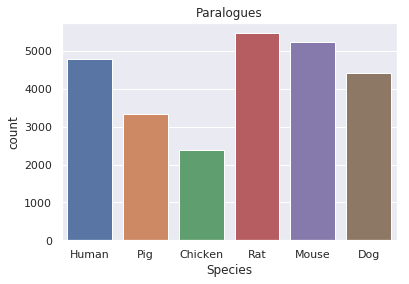

In [22]:
ax = sb.countplot(x="Species", data=paralog_df_complete)
ax.set_title("Paralogues")

In [23]:
ohnologs_df_complete['Species'].value_counts()

Mouse      5154
Human      4678
Pig        4482
Dog        4422
Rat        4023
Chicken    1368
Name: Species, dtype: int64

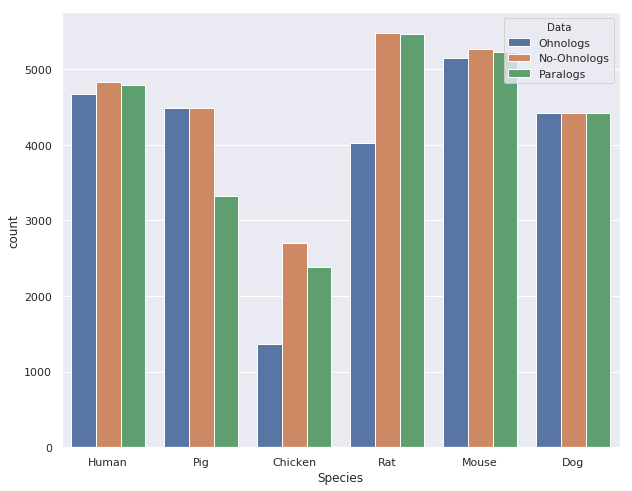

In [24]:
df_ohnolog = ohnologs_df_complete.copy()
df_ohnolog["Data"] = "Ohnologs"
df_no_ohnolog = no_ohnologs_df_complete.copy()
df_no_ohnolog["Data"] = "No-Ohnologs"
df_paralog = paralog_df_complete.copy()
df_paralog["Data"] = "Paralogs"

df_count_complete = df_ohnolog.append(df_no_ohnolog)
df_count_complete = df_count_complete.append(df_paralog)
len(df_count_complete)

plt.figure(figsize=(10,8))

ax = sb.countplot(x="Species",hue="Data", data=df_count_complete)

In [25]:
def equalize_datasets(target_df,modify_df):
    counts = target_df['Species'].value_counts()
    UniqueNames = target_df.Species.unique()   
    
    DataFrameDict = {elem : pd.DataFrame for elem in UniqueNames}
    for key in DataFrameDict.keys():
        DataFrameDict[key] = modify_df[:][modify_df.Species == key]
        
    df_temp = pd.DataFrame(columns= list(target_df))
    for animal in animalList:
        if(counts[animal]<len(DataFrameDict[animal])):
            df_temp = df_temp.append(DataFrameDict[animal].sample(counts[animal]))
        else:
            df_temp = df_temp.append(DataFrameDict[animal])
    df_temp.sample(frac=1,random_state=42)
    return df_temp

In [26]:
no_ohnologs_df_complete = equalize_datasets(ohnologs_df_complete,no_ohnologs_df_complete)
paralog_df_complete = equalize_datasets(ohnologs_df_complete,paralog_df_complete)

In [27]:
len(ohnologs_df_complete)

24127

Text(0.5, 1.0, 'No Ohnologs')

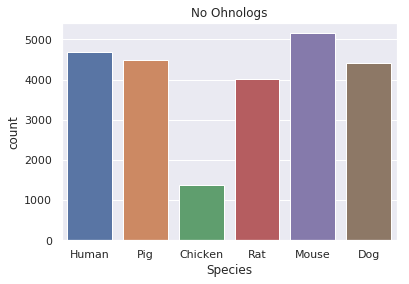

In [28]:
ax = sb.countplot(x="Species", data=no_ohnologs_df_complete)
ax.set_title("No Ohnologs")

Text(0.5, 1.0, 'Paralogues')

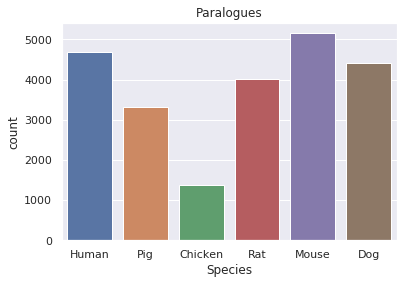

In [29]:
ax = sb.countplot(x="Species", data=paralog_df_complete)
ax.set_title("Paralogues")

In [30]:
df_on_dataset = ohnologs_df_complete.append(no_ohnologs_df_complete)
df_on_dataset = df_on_dataset.sample(frac=1,random_state=42)
len(df_on_dataset)

48254

In [31]:
df_on_dataset.head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species
3763,1,0.0,TAAGCATGGCGGCGGCGGCGTTCGTGGTCCCTCGGGTGAAACAGAA...,0.394357,ENSCAFG00000004379,6309,ENSCAFT00000046254,GAAGCCAGTTGAGGGAAATTCTCCATGAATGTACGTCACAATGATG...,0.512660,ENSCAFG00000015349,3673,ENSCAFT00000024382,Dog
1828,0,0.0,ATGGGAGATGCAGTTAACATGTTAAAGCAGAAATTTAAAGAGGAGG...,0.433225,ENSSSCG00000024517,2763,ENSSSCT00000026181,TTTTGTGGCTGTTTCCTGTGGGACGTGGTGGTGGCCGTTGGGTCGG...,0.447556,ENSSSCG00000017732,2107,ENSSSCT00000019299,Pig
2735,0,0.0,AAACCATGTGGCTGGAGGCGCGAGCTGGGGTGTGGGCGAGGTTCAG...,0.546898,ENSG00000074582,2015,ENST00000431802,TTCTTGGGGCTGATGTCCGCAAATATGCAGAATTACCGGCCGGGTC...,0.527115,ENSG00000197461,2305,ENST00000402802,Human
4143,1,0.0,ATGTCACCTACTTCCAAGGAAAACCCACTGGTACGCCCAGCACGTG...,0.645725,ENSCAFG00000009443,1544,ENSCAFT00000044272,ATGTCCTACCCGCAGTTTGGATACCCGTATTCCTCCGCACCCCAGT...,0.651306,ENSCAFG00000010441,1302,ENSCAFT00000016576,Dog
3067,0,0.0,ATGCAGAGGGTCTGCTACCTCATTCACCTCGCCTTCTGCTGGGCAG...,0.507246,ENSSSCG00000002053,345,ENSSSCT00000002296,TTGGATGGCTCCTGCTCTTTCACCAAGTCTCTCTGCGACCTTGGGC...,0.539455,ENSSSCG00000010006,2788,ENSSSCT00000010963,Pig


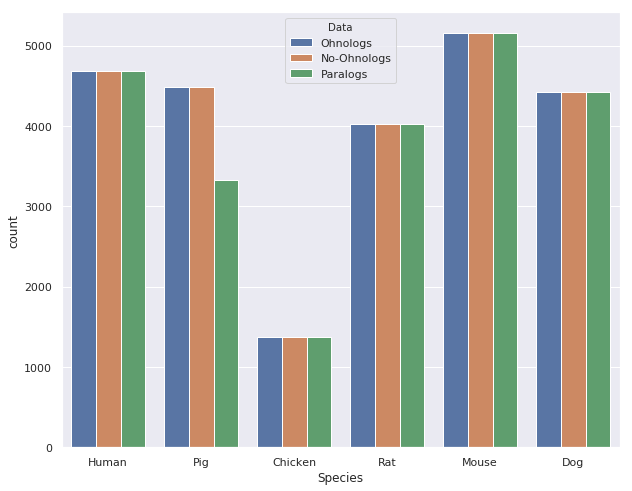

In [32]:
df_ohnolog = ohnologs_df_complete.copy()
df_ohnolog["Data"] = "Ohnologs"
df_no_ohnolog = no_ohnologs_df_complete.copy()
df_no_ohnolog["Data"] = "No-Ohnologs"
df_paralog = paralog_df_complete.copy()
df_paralog["Data"] = "Paralogs"

df_count_complete = df_ohnolog.append(df_no_ohnolog)
df_count_complete = df_count_complete.append(df_paralog)
len(df_count_complete)

plt.figure(figsize=(10,8))


ax = sb.countplot(x="Species",hue="Data", data=df_count_complete)

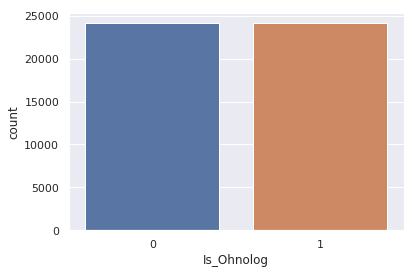

In [33]:
ax = sb.countplot(x="Is_Ohnolog", data=df_on_dataset)

In [34]:
## Absolute incredible outlier xd

## Onhologs outlier handling

Text(0.5, 1.0, 'Ohnologs')

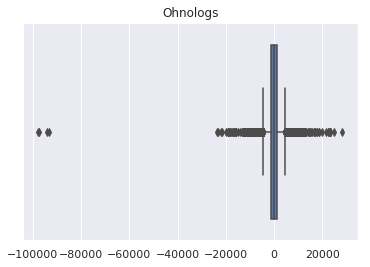

In [35]:
difference_length = ohnologs_df_complete['Sequence-1 Length'] - ohnologs_df_complete['Sequence-2 Length']
ax = sb.boxplot(x=difference_length)
ax.set_title("Ohnologs")

/home/jboffi/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Ohnologs')

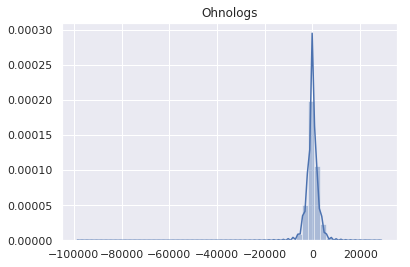

In [36]:
ax = sb.distplot(difference_length)
ax.set_title("Ohnologs")

In [37]:
mean = (ohnologs_df_complete['Sequence-1 Length'] - ohnologs_df_complete['Sequence-2 Length']).mean()
print(mean)
std =(ohnologs_df_complete['Sequence-1 Length'] - ohnologs_df_complete['Sequence-2 Length']).std()
print(std)

-77.75985410535914
2786.949972816542


In [38]:
initial_len = len(difference_length)
up_limit = mean + 2*std;
down_limit = mean - 2*std;

difference_length = difference_length[operator.and_(difference_length<up_limit,difference_length>down_limit)]
len(difference_length)/initial_len

0.9671322584656195

Text(0.5, 1.0, 'Ohnologs')

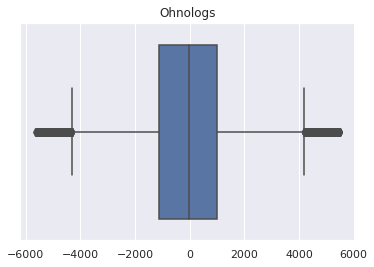

In [39]:
ax = sb.boxplot(x=difference_length)
ax.set_title("Ohnologs")

## No Ohnologs outlier handling

Text(0.5, 1.0, 'No Ohnologs')

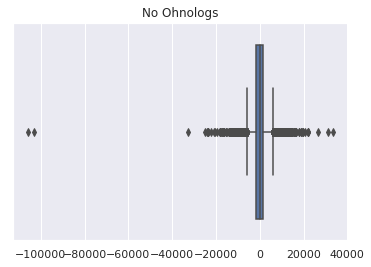

In [40]:
difference_length = no_ohnologs_df_complete['Sequence-1 Length'] - no_ohnologs_df_complete['Sequence-2 Length']
ax = sb.boxplot(x=list(difference_length))
ax.set_title("No Ohnologs")

/home/jboffi/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'No Ohnologs')

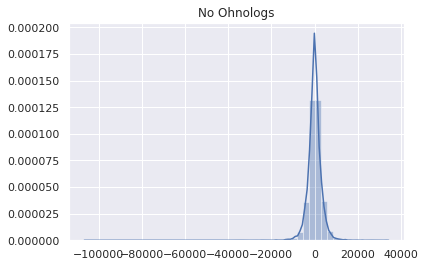

In [41]:
ax = sb.distplot(list(difference_length))
ax.set_title("No Ohnologs")

In [42]:
mean = (no_ohnologs_df_complete['Sequence-1 Length'] - no_ohnologs_df_complete['Sequence-2 Length']).mean()
print(mean)
std =(no_ohnologs_df_complete['Sequence-1 Length'] - no_ohnologs_df_complete['Sequence-2 Length']).std()
print(std)

-2.4521490446387864
3200.48517545491


In [43]:
initial_len = len(difference_length)
up_limit = mean + 2*std;
down_limit = mean - 2*std;

difference_length = difference_length[operator.and_(difference_length<up_limit,difference_length>down_limit)]
len(difference_length)/initial_len

0.9555684502839142

Text(0.5, 1.0, 'No Ohnologs')

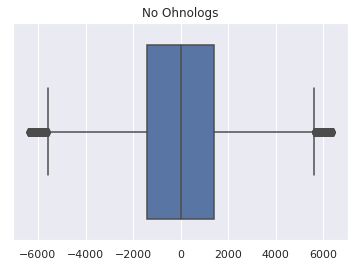

In [44]:
ax = sb.boxplot(x=list(difference_length))
ax.set_title("No Ohnologs")

## Paralogs outlier handling

Text(0.5, 1.0, 'Paralogs')

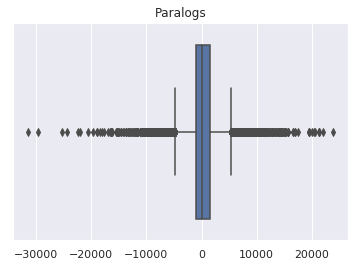

In [45]:
difference_length = paralog_df_complete['Sequence-1 Length'] - paralog_df_complete['Sequence-2 Length']
ax = sb.boxplot(x=list(difference_length))
ax.set_title("Paralogs")

Text(0.5, 1.0, 'Paralog')

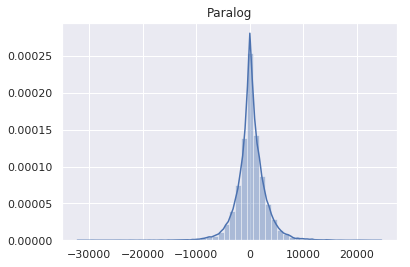

In [46]:
ax = sb.distplot(list(difference_length))
ax.set_title("Paralog")

In [47]:
mean = (paralog_df_complete['Sequence-1 Length'] - paralog_df_complete['Sequence-2 Length']).mean()
print(mean)
std =(paralog_df_complete['Sequence-1 Length'] - paralog_df_complete['Sequence-2 Length']).std()
print(std)

236.4729441469679
2841.947825035418


In [48]:
initial_len = len(difference_length)
up_limit = mean + 2*std;
down_limit = mean - 2*std;

difference_length = difference_length[operator.and_(difference_length<up_limit,difference_length>down_limit)]
len(difference_length)/initial_len

0.9479343520090548

Text(0.5, 1.0, 'No Ohnologs')

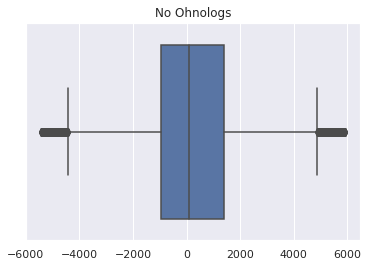

In [49]:
ax = sb.boxplot(x=list(difference_length))
ax.set_title("No Ohnologs")

In [50]:
df_features_dict = {}
for animal in animalList:
    df = pd.read_csv("Feature_Data/" + animal + "/" + animal.lower() + " _gene_transcript.csv",delimiter=',')    
    df_features_dict[animal] = df.set_index(["EnsembleGeneID","TranscriptID"])

In [51]:
def addFeatures(df):
    transcript_version_1 = []
    chromosome_name_1 = []
    transcript_biotype_1 = []

    transcript_version_2 = []
    chromosome_name_2 = []
    transcript_biotype_2 = []

    for index, row in df.iterrows():
        row1 = df_features_dict[row["Species"]].loc[(row["Sequence-1 Id"],row["Sequence-1-Transcript Id"])]
        row2 = df_features_dict[row["Species"]].loc[(row["Sequence-2 Id"],row["Sequence-2-Transcript Id"])]

        transcript_version_1.append(row1["TranscriptVersion"])
        chromosome_name_1.append(row1["ChromosomeName"])
        transcript_biotype_1.append(row1["TranscriptBiotype"])

        transcript_version_2.append(row2["TranscriptVersion"])
        chromosome_name_2.append(row2["ChromosomeName"])
        transcript_biotype_2.append(row2["TranscriptBiotype"])


    df["Sequence-1-Transcript-Version"] = transcript_version_1
    df["Sequence-2-Transcript-Version"] = transcript_version_2

    df["Sequence-1-Transcript-Biotype"] = transcript_biotype_1
    df["Sequence-2-Transcript-Biotype"] = transcript_biotype_2

    df["Sequence-1-Chromosome"] = chromosome_name_1
    df["Sequence-2-Chromosome"] = chromosome_name_2
    
    return df


In [52]:
ohnologs_df_complete = addFeatures(ohnologs_df_complete)
no_ohnologs_df_complete = addFeatures(no_ohnologs_df_complete)
paralog_df_complete = addFeatures(paralog_df_complete)

In [53]:
ohnologs_df_complete.head()

,Is_Ohnolog,Is_Paralog,Sequence-1,Sequence-1 GC,Sequence-1 Id,Sequence-1 Length,Sequence-1-Transcript Id,Sequence-2,Sequence-2 GC,Sequence-2 Id,Sequence-2 Length,Sequence-2-Transcript Id,Species,Sequence-1-Transcript-Version,Sequence-2-Transcript-Version,Sequence-1-Transcript-Biotype,Sequence-2-Transcript-Biotype,Sequence-1-Chromosome,Sequence-2-Chromosome
0,1,0.0,CTTTGGAAGTCCTATGAGGGACCATTTACGGTTTCCTCAGTAATTT...,0.429090,ENSG00000095464,3307,ENST00000371447,AGTATGTTTTGCAGACAAGACCCAGAGAAGTCCAGACTGGACTTGT...,0.469856,ENSG00000132915,5706,ENST00000508173,Human,3,5,protein_coding,retained_intron,10,5
1,1,0.0,CGTTTTGGCAAGGGATTAAAGTGCTCCCCCCTGTGGCAGCAGTGAC...,0.441268,ENSG00000077684,5772,ENST00000226319,ATACAATAGTGCTCCGCGCCGCCTCAGCCGCCGCCGCCGCCCAACC...,0.450953,ENSG00000102221,4934,ENST00000614628,Human,10,4,protein_coding,protein_coding,4,X
2,1,0.0,AGTCAACCTCTGGAAGTAAGTCAACTCCATTCTGAAAAAGAAGAGT...,0.357972,ENSG00000109158,11973,ENST00000264318,ACATAATCTAAGACCACAAACCACCTTGTTCCACGTGAGAAGGAAA...,0.402006,ENSG00000145863,2393,ENST00000523217,Human,3,5,protein_coding,protein_coding,4,5
3,1,0.0,ACCACAGAGGCGTCTGGCTAACTCATCTCCAGACCTAAGTTGGGAA...,0.572634,ENSG00000137216,3318,ENST00000259746,CAGTCTCCTGCCATGCAAAGAAGGCTCATAGAGTTGCTTTGGAAGT...,0.516923,ENSG00000196187,5407,ENST00000474478,Human,13,5,protein_coding,processed_transcript,6,1
4,1,0.0,GGGCCTCCTCCCTGGGGTGTGAGCAGGTCGGCGCGCCACACTTCTC...,0.468779,ENSG00000113396,3219,ENST00000262462,AGTCCTGCCCGGAACCCCCGGCAACGCGCATACGACTACACCTGCT...,0.489140,ENSG00000140284,2394,ENST00000267842,Human,8,9,protein_coding,protein_coding,5,15


## Create Pkl with cleaned data to do the embeddings

In [54]:
train_filepath = "train_workspace/" + workingLevel + "/"

In [55]:
ohnologs_df_complete.to_pickle(train_filepath + "python2_pickle/" + "ohnologs-complete_p2_v2.pkl", protocol=2)
no_ohnologs_df_complete.to_pickle(train_filepath + "python2_pickle/"+ "no-ohnologs-complete_p2_v2.pkl", protocol=2)
paralog_df_complete.to_pickle(train_filepath + "python2_pickle/" + "paralog-complete_p2_v2.pkl", protocol=2)

In [56]:
ohnologs_df_complete.to_pickle(train_filepath + "ohnologs-complete_v2.pkl")
no_ohnologs_df_complete.to_pickle(train_filepath + "no-ohnologs-complete_v2.pkl")
paralog_df_complete.to_pickle(train_filepath + "paralog-complete_v2.pkl")